<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Exploring-Data" data-toc-modified-id="Exploring-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring Data</a></span><ul class="toc-item"><li><span><a href="#Autocorrelation-Function-(acf)" data-toc-modified-id="Autocorrelation-Function-(acf)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Autocorrelation Function (acf)</a></span></li><li><span><a href="#Partial-Autocorrelation-Function-(pacf)" data-toc-modified-id="Partial-Autocorrelation-Function-(pacf)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Partial Autocorrelation Function (pacf)</a></span></li><li><span><a href="#Dickey-Fuller-Test" data-toc-modified-id="Dickey-Fuller-Test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dickey-Fuller Test</a></span></li></ul></li><li><span><a href="#Creating-Time-Series" data-toc-modified-id="Creating-Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating Time Series</a></span></li><li><span><a href="#Forcasting-Stock-Price" data-toc-modified-id="Forcasting-Stock-Price-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Forcasting Stock Price</a></span></li><li><span><a href="#Evaluating-Model" data-toc-modified-id="Evaluating-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluating Model</a></span></li><li><span><a href="#Ljung-Box-Test" data-toc-modified-id="Ljung-Box-Test-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ljung-Box Test</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# ARIMA Modelling: Stock Price Forecasting

## Introduction
- ARIMA (Autoregressive Integrated Moving Average) is a major tool used in time series analysis to attempt to forecast future values of a variable based on its present value. 
- In this project, dataset for stock price time series of Johnson & Johnson (JNJ) from 2006-2016 is used, and using ARIMA model price forecasting is conducted on this time series.

## Loading Data

In [1]:
#Load libraries
library(MASS)
library(tseries)
library(forecast)

# Load Data
mydata<- read.csv("jnj.csv")
attach(mydata)

In [2]:
head(mydata)

Date,Adjusted.Close.Price,lnstock,lnstockdiff
04/10/2006,49.60875,3.904167,0.000000000
01/11/2006,48.78605,3.887444,-0.016722676
01/12/2006,48.86747,3.889112,0.001667467
03/01/2007,49.44482,3.900857,0.011745441
01/02/2007,46.85150,3.846983,-0.053874399
01/03/2007,44.86367,3.803628,-0.043354558


## Exploring Data

- The purpose of ARIMA is to determine the nature of the relationship between our residuals, which would provide our model with a certain degree of forecasting power.
- In the first instance, in order to conduct a time series analysis it is must express our dataset in terms of logarithms.
- If the data is expressed solely in price terms, then this does not allow for continuous compounding of returns over time and will give misleading results.

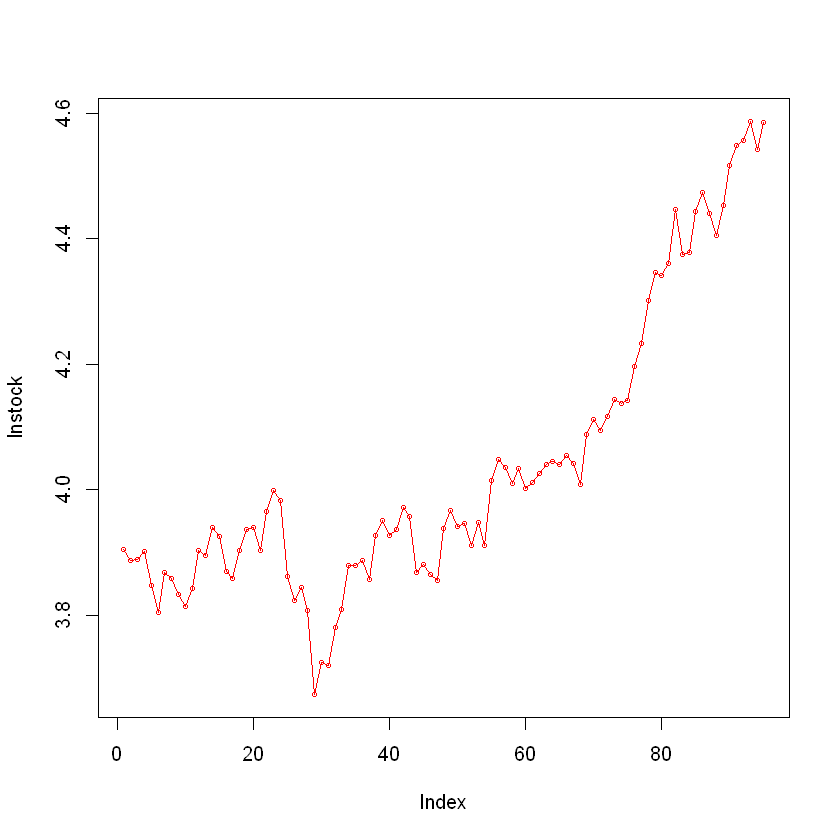

In [11]:
#Plot and convert to ln format
lnstock=log(Adjusted.Close.Price[1:95]) # around 80% of data into for training model
plot(lnstock, type = 'o',cex = .5, col = "red")

- Additionally, by using the acf and pacf (Autocorrelation and Partial Autocorrelation) functions in R, we can determine the nature of potential seasonal lags in our model.
- The autocorrelation and partial autocorrelation function both measure, to varying degrees, the correlation coeficient between a series and lags of the variable over time.
- An autoregressive process is when a time series follows a particular pattern in that its present value is in some way correlated to its past value(s).
- For instance, if we are able to use regression analysis to find out the present value of a variable from using its past value, then we refer to this as an AR(1) process: X<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>*X<sub>(t-1)</sub> + e<sub>t</sub>
- An AR(1) process is characterised by a slow drop in ACF followed by a sudden cutof in PACF:

### Autocorrelation Function (acf)

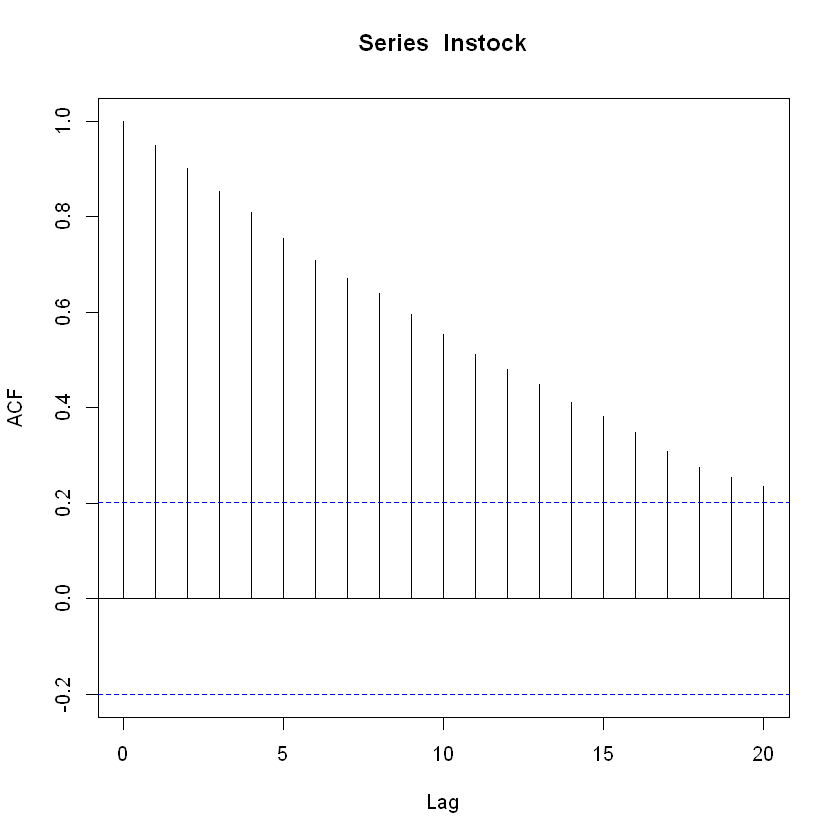

In [16]:
acf(lnstock, lag.max=20)

### Partial Autocorrelation Function (pacf)

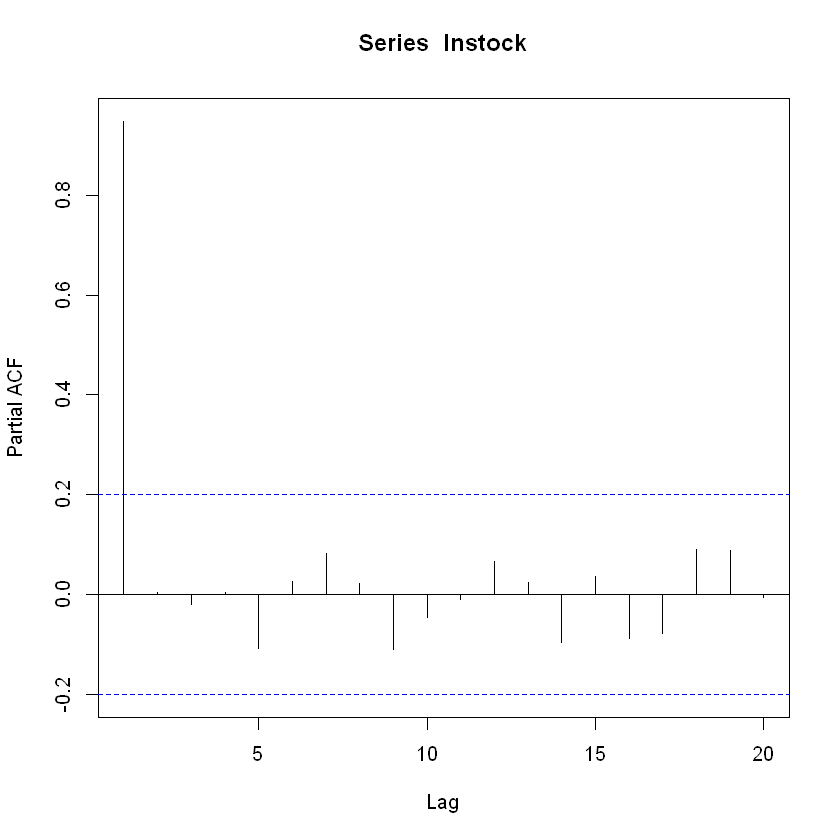

In [14]:
pacf(lnstock, lag.max=20)

### Dickey-Fuller Test
In order to use an ARIMA model, we first wish to test if our time series is stationary; i.e. do we have a constant mean, variance and autocorrelation across our time series dataset. For this purpose, we use the Dickey-Fuller Test. At the 5% level of significance:
- H0: Non-stationary series
- HA: Stationary series

In [45]:
adf_test<-adf.test(lnstock)
adf_test
cat("With a p-value of", as.numeric(adf_test[4]), "can accept data as", as.character(adf_test[3]))


	Augmented Dickey-Fuller Test

data:  lnstock
Dickey-Fuller = -1.2562, Lag order = 4, p-value = 0.8836
alternative hypothesis: stationary


With a p-value of 0.8835804 can accept data as stationary

## Creating Time Series
- To generate an ARIMA plot and output by letting R itself decide the appropriate parameters using ARIMA, we use the auto.arima function as follows:

Series: pricearima 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.0072
s.e.  0.0044

sigma^2 estimated as 0.001835:  log likelihood=163.25
AIC=-322.5   AICc=-322.37   BIC=-317.41

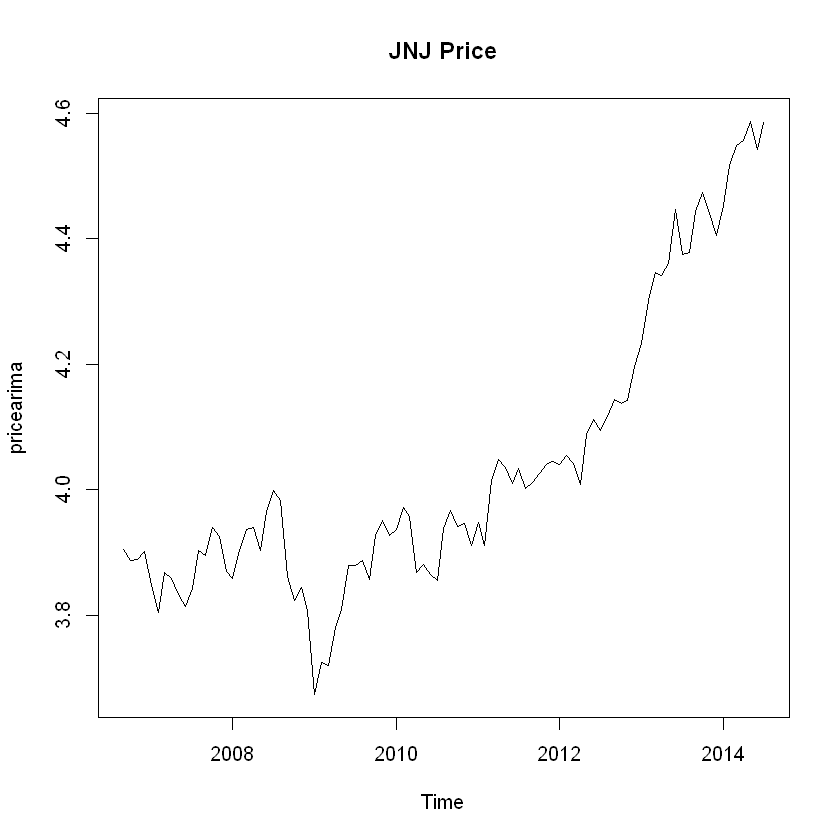

In [47]:
#Time series and auto.arima
pricearima <- ts(lnstock, start = c(2006,09), frequency = 12)
fitlnstock<-auto.arima(pricearima)
fitlnstock
plot(pricearima,type='l')
title('JNJ Price')
#exp(lnstock)

## Forcasting Stock Price

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Aug 2014       4.592353 4.537449 4.647257 4.508384 4.676321
Sep 2014       4.599597 4.521951 4.677243 4.480847 4.718346
Oct 2014       4.606841 4.511744 4.701937 4.461403 4.752279
Nov 2014       4.614085 4.504277 4.723893 4.446148 4.782022
Dec 2014       4.621329 4.498560 4.744098 4.433570 4.809088
Jan 2015       4.628573 4.494086 4.763060 4.422893 4.834253
Feb 2015       4.635817 4.490554 4.781080 4.413657 4.857977
Mar 2015       4.643061 4.487769 4.798353 4.405562 4.880560
Apr 2015       4.650305 4.485593 4.815017 4.398400 4.902211
May 2015       4.657549 4.483927 4.831171 4.392017 4.923081
Jun 2015       4.664793 4.482697 4.846889 4.386301 4.943285
Jul 2015       4.672037 4.481844 4.862231 4.381162 4.962913
Aug 2015       4.679281 4.481322 4.877241 4.376528 4.982034
Sep 2015       4.686525 4.481093 4.891958 4.372344 5.000707
Oct 2015       4.693769 4.481127 4.906412 4.368561 5.018978
Nov 2015       4.701014 4.481397 4.92063

[1]  98.72643  99.44420 100.16720 100.89545 101.62900 102.36788 103.11213
 [8] 103.86179 104.61690 105.37751 106.14364 106.91534 107.69265 108.47562
[15] 109.26427 110.05866 110.85883 111.66481 112.47666 113.29440 114.11809
[22] 114.94777 115.78349 116.62527 117.47318 118.32725

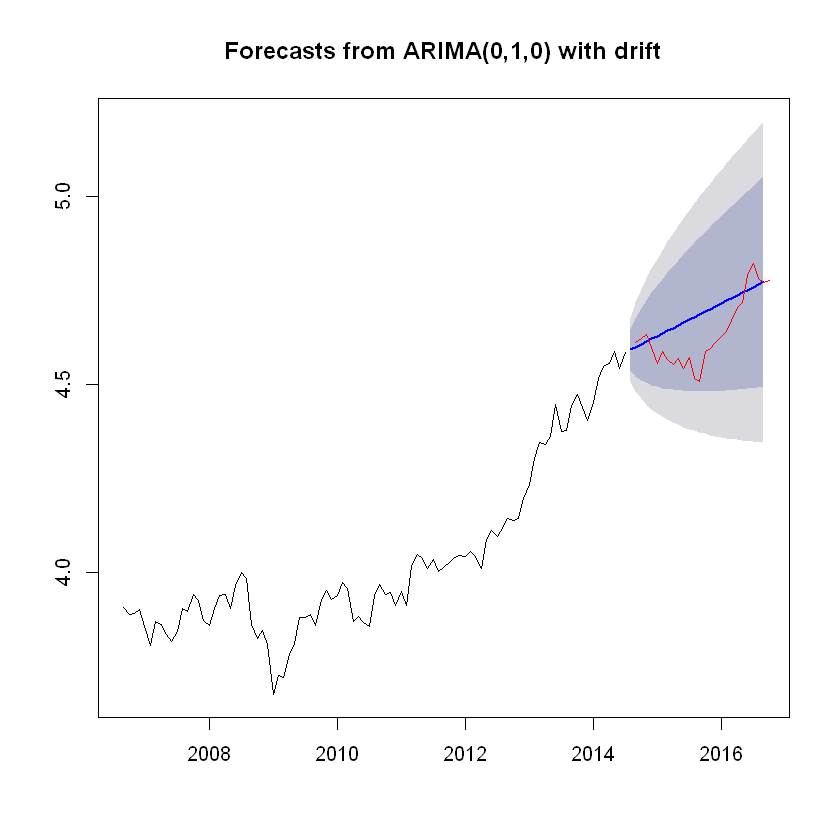

In [22]:
#Forecasted Values From ARIMA
forecastedvalues_ln=forecast(fitlnstock,h=26)
forecastedvalues_ln
plot(forecastedvalues_ln)

# Shows test data timeseries in RED color on plot
lnstock_test=log(Adjusted.Close.Price[96:121])
pricearima_test <- ts(lnstock_test, start = c(2014,09), frequency = 12)
lines(pricearima_test, col = 'red')

#we can also obtain the exponents of the ln forecasts in order to obtain real price
forecastedvaluesextracted=as.numeric(forecastedvalues_ln$mean)
finalforecastvalues=exp(forecastedvaluesextracted)
finalforecastvalues

## Evaluating Model

In [23]:
#Percentage Error
df<-data.frame(Adjusted.Close.Price[96:121],finalforecastvalues,0) # remaining data for testing
col_headings<-c("Actual Price","Forecasted Price","Percentage Error")
names(df)<-col_headings
attach(df)
percentage_error=((df$`Actual Price`-df$`Forecasted Price`)/(df$`Actual Price`))
df$`Percentage Error`<-percentage_error
df
cat("Mean Percentage Error = ", mean(percentage_error))

Actual Price,Forecasted Price,Percentage Error
100.71622,98.72643,0.019756471
101.84065,99.44420,0.023531345
102.95091,100.16720,0.027039220
99.45106,100.89545,-0.014523669
95.23792,101.62900,-0.067106492
98.17435,102.36788,-0.042715128
96.34512,103.11213,-0.070237132
95.00433,103.86179,-0.093232141
96.60394,104.61690,-0.082946600
94.01857,105.37751,-0.120815871


Mean Percentage Error =  -0.04952937

## Ljung-Box Test
<p>While we could potentially use this model to forecast future values for price, an important test used to validate the indings of the ARIMA model is the Ljung-Box test. Essentially, the test is being used to determine if the residuals of our time series follow a random pattern, or if there is a significant degree of non-randomness.
- H0: Residuals follow a random pattern
- HA: Residuals do not follow a random pattern

In [49]:
#Ljung-Box
Box.test(fitlnstock$resid, lag=5, type="Ljung-Box")
Box.test(fitlnstock$resid, lag=10, type="Ljung-Box")
Box.test(fitlnstock$resid, lag=15, type="Ljung-Box")


	Box-Ljung test

data:  fitlnstock$resid
X-squared = 9.0445, df = 5, p-value = 0.1073



	Box-Ljung test

data:  fitlnstock$resid
X-squared = 12.835, df = 10, p-value = 0.2331



	Box-Ljung test

data:  fitlnstock$resid
X-squared = 15.156, df = 15, p-value = 0.4403


## Conclusion

- From the above Ljung-Box Test, we see that we have an insignificant p-value.
- This means that there is likely a high degree of randomness exhibited by residuals and therefore our ARIMA model is free of autocorrelation.
- This model can be used for prediction of stock prices of near future.